In [1]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
from PIL import Image

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
# `image` is an RGB PIL.Image

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

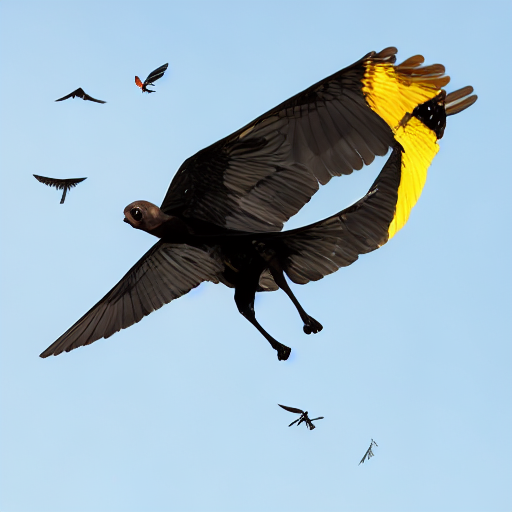

In [32]:
ref_image = Image.open("./training_data/images/bird1.jpg").convert("RGB").resize((512, 512))
images = pipe("make it stretch its wings to fly in the sky", image= ref_image).images
images[0]